# **Data science workshop project**
Elad, Tsach, Oz, Eva


Goal of the projet: The predictors of in-hospital mortality for admitted patients remain poorly characterized.
=> We aimed to develop and validate a prediction model for all-cause in-hospital mortality among admitted patients.


## **Part 1- Data analysis**

**Goal: Understand the data to build better model of prediction**


- 85 features in original dataset
- not separated in train/test/validation
- prediction problem: classification : hospital death or not

In [1]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

In [2]:
complete_data = pd.read_csv('dataset.csv')

In [3]:
complete_data.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [4]:
complete_data.shape   #dataset sizes

(91713, 85)

In [5]:
len(complete_data)

91713

In [6]:
#column and data types
complete_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

We have the column 83 that is empty so we will delete it. In addition we will also remove the feature encounter_id and patient_id becuse their are unique for each patient and do not impact the prediction.

In [7]:

complete_data.drop(complete_data.columns[[0,1,83]], axis=1, inplace=True)

numerics = ['int64', 'float64']

numerical_features = complete_data.select_dtypes(include=numerics).columns
#print(numerical_features)
categorical_features = complete_data.select_dtypes(include='object').columns
len(numerical_features)

75

important technical words: 
- icu: intensive care unit
- APACHE : Acute Physiology, Age, Chronic Health Evaluation

Explication about features :

    -bmi: The body mass index of the person on unit admission => BMI Categories:
            Underweight = <18.5
            Normal weight = 18.5–24.9
            Overweight = 25–29.9
            Obesity = BMI of 30 or greater
         => maybe change this numerical data to category : more meaningful for a model because close number can have a very different impact depends on the exact value.
         
     - elective surgery: Whether the patient was admitted to the hospital for an elective surgical operation (surgery that is scheduled in advance because it does not involve a medical emergency.) (binary : 0 or 1)
     - icu_admit_source: The location of the patient prior to being admitted to the unit (categorical : Accident & Emergency, OperatingRoom / Recovery,...)
     - icu_id: A unique identifier for the unit to which the patient was admitted 
     - icu_type: A classification which indicates the type of care the unit is capable of providing
     - pre_icu_los_days: amount of time the patient wait for admission
     - apache_2_diagnosis: APACHE II score is a general measure of disease severity based on current physiologic measurements, age & previous health conditions. The score can help in the assessment of patients to determine the level & degree of diagnostic & therapeutic intervention.
     - apache_3j_diagnosis: methodology in order to more accurately predict hospital mortality risk for critically ill hospitalized adults.
     - apache_post_operative: The APACHE operative status (binary:  1 for post-operative, 0 for non-operative)
     
     (need to continue for other non clear features)
     

In [8]:
class_prediction = "hospital_death" #binary : 0 or 1

In [9]:
complete_data["hospital_death"].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

<AxesSubplot:>

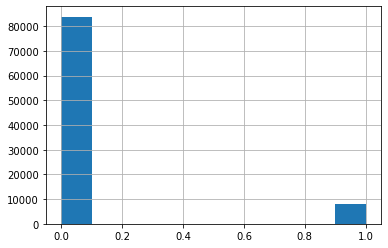

In [10]:
complete_data["hospital_death"].hist(bins=10)

The distribution of the two classes is not balanced at all : it will be challenging

In [11]:
complete_data.describe() #only for numerical data

,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,90051.000000,90612.000000,...,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,91713.000000
mean,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,185.401739,558.216377,...,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,0.086302
std,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,86.050882,463.266985,...,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,0.280811
min,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,101.000000,0.010000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,113.000000,203.010000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,122.000000,409.020000,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,301.000000,703.030000,...,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,308.000000,2201.050000,...,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
to do: 
histogram:
    "age", "bmi", "height", "weight", "icu_admit_source", "icu_id", "pre_icu_los_days", "apache_2_diagnosis"
    
    binary : "elective_surgery", "gender", "apache_post_operative"

to do:
- what to do with missing values?
- check link between  feature 'icu_admit_source' and 'icu_id' and 'icu_type' => maybe remove one of them or change representation? change it to category??
- check link between all apache features:  maybe remove one of them or change representation? change it to category??